# TFM : Inferencia de noticias de Donald Trump en modelos de predicción de valores en Dow Jones

# Autor : Luis Morales Alcalá

## Parte 1: Análisis y limpieza de dataset de entrenamiento

Para el desarrollo de este TFM voy a basarme en el dataset "Sentiment140" como dataset para el entrenamiento de mi modelo. Este dataset fue creado por la universidad de Stanford.

A continuación presento un enlace donde se puede encontrar más información sobre el mismo:
http://help.sentiment140.com/for-students/<br><br>
El dataset se puede descargar del siguiente enlace.<br>
http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip

El formato del dataset es el siguiente:

El archivo es un CSV con los emoticonos ya eliminados, dispone de 6 campos:

0 - Polaridad del tweet (0 = negativo, 2 = neutral, 4 = positivo)<br>
1 - el id del tweet (2087)<br>
2 - Fecha del tweet (Sat May 16 23:58:44 UTC 2009)<br>
3 - La query (lyx).Si no hay query, entonces el valor es NO_QUERY.<br>
4 -El usuario que realizó el tweet (robotickilldozr)<br>
5 - Texto del tweet (Lyx is cool)<br>


Una vez entrenado y validado se procederá a realizar un análisis en profundidad del dataset del presidente Donald Trump.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd  
import numpy as np

plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
cols = ['sentimiento','id','fecha','query_string','user','mensaje']

In [3]:
df_inicial = pd.read_csv("./training.1600000.processed.noemoticon.csv",header=None, names=cols,encoding='cp1252')

## 1. Análisis descriptivo de los datos

In [4]:
df_inicial.head()

,sentimiento,id,fecha,query_string,user,mensaje
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
df_inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   sentimiento   1600000 non-null  int64 
 1   id            1600000 non-null  int64 
 2   fecha         1600000 non-null  object
 3   query_string  1600000 non-null  object
 4   user          1600000 non-null  object
 5   mensaje       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [6]:
df_inicial.sentimiento.value_counts()

4    800000
0    800000
Name: sentimiento, dtype: int64

El dataset contiene 1,6 millones de entradas que se encuentran balanceadas en dos tipos de sentimiento, negativo y positivo. En el dataset a pesar de que se indica que existe una clase neutral, como se puede observar no existe. Se destaca que no existen valores nulos por lo que en esta fase no será necesario aplicar ningún tipo de tratamiento del conjunto de datos al respecto.

Proceso a eliminar las categorías que no necesarias para la tarea que voy a acometer, para la tarea de clasificación de sentinmiento no es relevante información relativa a la fecha, id del mensaje, ni usuario ni si el mensaje a sido utilizado en una query

In [7]:
df_inicial.drop(['id','fecha','query_string','user'],axis=1,inplace=True)

In [8]:
df_inicial.head()

,sentimiento,mensaje
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


A continuación paso a mostrar los 8 primeros mesajes con sentimiento negativo y positivo.

Negativo:

In [9]:
df_inicial[df_inicial.sentimiento==0].head(8)

,sentimiento,mensaje
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
5,0,@Kwesidei not the whole crew
6,0,Need a hug
7,0,@LOLTrish hey long time no see! Yes.. Rains a...


Positivo:

In [10]:
df_inicial[df_inicial.sentimiento==4].head(8)

,sentimiento,mensaje
800000,4,I LOVE @Health4UandPets u guys r the best!!
800001,4,im meeting up with one of my besties tonight! ...
800002,4,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,4,Being sick can be really cheap when it hurts t...
800004,4,@LovesBrooklyn2 he has that effect on everyone
800005,4,@ProductOfFear You can tell him that I just bu...
800006,4,@r_keith_hill Thans for your response. Ihad al...
800007,4,"@KeepinUpWKris I am so jealous, hope you had a..."


In [11]:
df_inicial[df_inicial.sentimiento == 4].index

Int64Index([ 800000,  800001,  800002,  800003,  800004,  800005,  800006,
             800007,  800008,  800009,
            ...
            1599990, 1599991, 1599992, 1599993, 1599994, 1599995, 1599996,
            1599997, 1599998, 1599999],
           dtype='int64', length=800000)

Se observa que el dataset presenta perfectamente divididos los mensajes clasificados como positivos y los negativos por del 0 --> 799999 los negativos y el resto los positivos.

In [12]:
df_inicial['sentimiento'] = df_inicial['sentimiento'].map({0: 0, 4: 1})

In [13]:
df_inicial.sentimiento.value_counts()

1    800000
0    800000
Name: sentimiento, dtype: int64

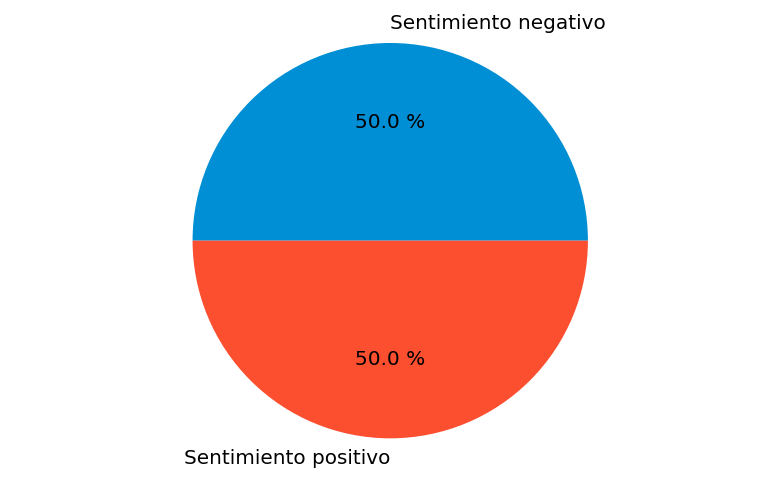

In [14]:
plt.pie(df_inicial.sentimiento.value_counts(), labels=["Sentimiento negativo", "Sentimiento positivo"], autopct="%0.1f %%")
plt.axis("equal")
plt.show()

Voy a proceder a realizar un análisis del tamaño de la columna mensaje para verificar la diversidad de la muestra

In [15]:
df_inicial['longitud'] = [len(t) for t in df_inicial.mensaje]
df_inicial

,sentimiento,mensaje,longitud
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,is upset that he can't update his Facebook by ...,111
2,0,@Kenichan I dived many times for the ball. Man...,89
3,0,my whole body feels itchy and like its on fire,47
4,0,"@nationwideclass no, it's not behaving at all....",111
...,...,...,...
1599995,1,Just woke up. Having no school is the best fee...,56
1599996,1,TheWDB.com - Very cool to hear old Walt interv...,78
1599997,1,Are you ready for your MoJo Makeover? Ask me f...,57
1599998,1,Happy 38th Birthday to my boo of alll time!!! ...,65


In [16]:
print ("El mensaje con mayor longitud es de: "+str(df_inicial['longitud'].max())+" caracteres")

El mensaje con mayor longitud es de: 374 caracteres


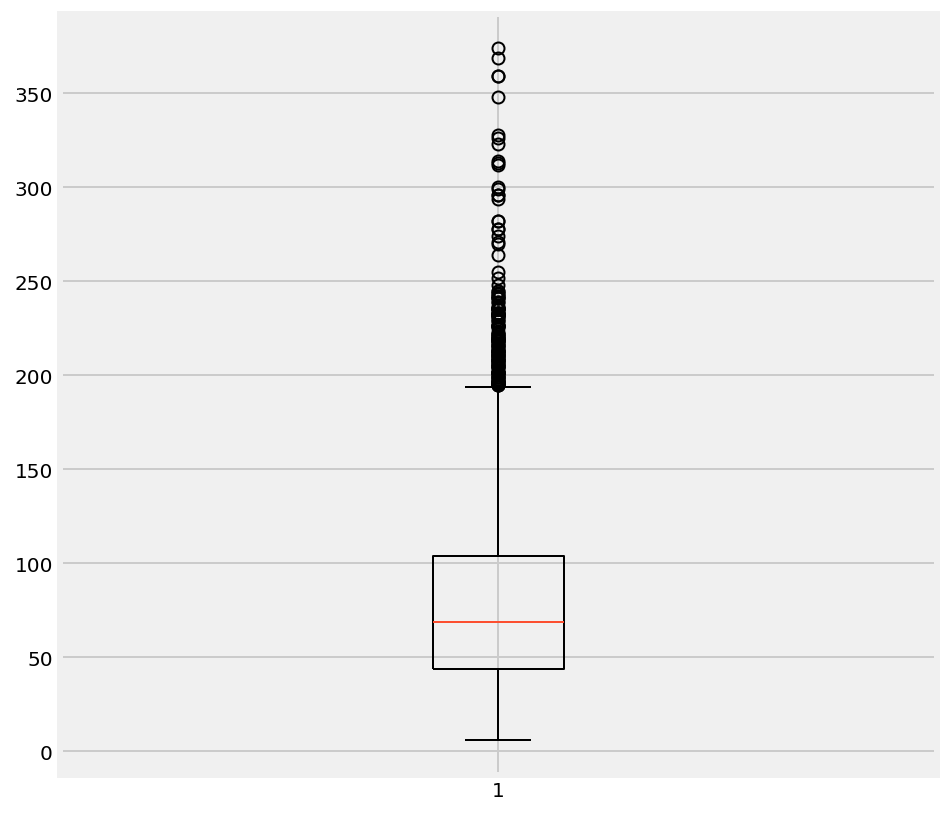

In [17]:
fig, ax = plt.subplots(figsize=(7, 7))
plt.boxplot(df_inicial.longitud)
plt.show()

## 2.Preprocesamiento de los mensajes

A continuanción se presenta una muestra de ejemplo del tratamiento que tendrá que ser realizado al conjunto de los mensajes del dataset, para ello he identificado varios ejemplos de mensajes que presentan ciertas características específicas que son necesarias eliminar en esta fase de preprocesamiento para que posteriormente el modelo sea capaz de realizar unaclasificación lo más precisa posible.

### 2.1 Tratamiento de las menciones @

Este tipo de funcionalidad de la red social permite que otro usuario mencione y ofrezca información relativa al mensaje original, por lo que no aporta valor en la construciión del modelo, al disponer ya del mensaje original.

In [18]:
df_inicial.mensaje[600]

'@Born_4_Broadway Lost  and it was St. Ignacius Prepatory School. Haha.'

In [19]:
import re as patternToDelete
patternToDelete.sub(r'@[A-Za-z0-9]+','',df_inicial.mensaje[600])

'_4_Broadway Lost  and it was St. Ignacius Prepatory School. Haha.'

### 2.2 Tratamiento de código Html existente en los mensajes

Procedo a decodificar el texto html existente para lo que me apoyo en la funcion BeautifulSoup

In [20]:
df_inicial.mensaje[119]

'@eRRe_sC aaw i miss ya all too.. im leaving to BH tomorrow &quot;morning&quot; i think.. aww i wanna go to the beach w u girls!! '

In [21]:
from bs4 import BeautifulSoup
out = BeautifulSoup(df_inicial.mensaje[119], 'lxml')
print (out.get_text())

@eRRe_sC aaw i miss ya all too.. im leaving to BH tomorrow "morning" i think.. aww i wanna go to the beach w u girls!! 


Como se puede observar una vez realizada la conversión se eliminan los textos del tipo '&quot','&amp'.

### 2.3 limpieza de links en los mensajes

In [22]:
df_inicial.mensaje[170]

'Crazy wind today = no birding  http://ff.im/1XTTi'

In [23]:
patternToDelete.sub('https?://[A-Za-z0-9./]+','',df_inicial.mensaje[170])

'Crazy wind today = no birding  '

### 2.4 Eliminación de hashtags y números

Siguiendo la misma filosofia que en los puntos anteriores, procedo a eliminar símbolos que entiendo que no son necesarios para el análisis de sentimiento como es el caso de la #

In [24]:
df_inicial.mensaje[190]

"I activated my Selfcontrol block early, meaning I can't check out the new QC.  Regularizing my internal clock is might be difficult. #fb"

In [25]:
patternToDelete.sub("[^a-zA-Z]", " ",df_inicial.mensaje[190])

'I activated my Selfcontrol block early  meaning I can t check out the new QC   Regularizing my internal clock is might be difficult   fb'

## 3.Limpieza de datos

Una vez mostradas las cuatro tareas anteriores en las que se realiza un tratamiento de limpieza de los datos, se procede a la creación de una función que será ejecutada sobre el conjunto total de los datos.
Esta función realizará las siguientes tareas de limpieza de los mensajes.

1.Souping.<br>
2.Eliminación del BOM.<br>
3.Eliminación de direcciones http y www así como eliminación del ID de Twitter.<br>
4.Conversión en minúsculas.<br>
5.Manejo de las contracciones en las negaciones.<br>
6.Eliminación de números y caracteres especiales.<br>
7.Join y tokenización para eliminación de espacios en blanco.<br>
8.Eliminación de emojis.

In [26]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

WordPunctTokenizer, esta función tokeniza una secuencia de caraceres alfanuméricos y no alfanuméricos

In [27]:
import emoji
def give_emoji_free_text(text):
    allchars = [str for str in text.decode('utf-8')]
    emoji_list = [c for c in allchars if c in emoji.UNICODE_EMOJI]
    clean_text = ' '.join([str for str in text.decode('utf-8').split() if not any(i in str for i in emoji_list)])
    return clean_text

In [28]:
patternToDelete1 = r'@[A-Za-z0-9_]+'
patternToDelete2 = r'https?://[^ ]+'
patron = r'|'.join((patternToDelete1, patternToDelete2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
patronNegacion = patternToDelete.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def limpieza_tweets(mensaje):
    out = BeautifulSoup(mensaje, 'lxml')
    out_souped = out.get_text()
    try:
        bom_borrado = out_souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_borrado = out_souped
    emoji_borrado = give_emoji_free_text(bom_borrado.encode('utf8'))
    mensajeAux = patternToDelete.sub(patron, '', emoji_borrado)  
    mensajeAux = patternToDelete.sub(www_pat, '', mensajeAux)
    lmensajeAux_lower_case = mensajeAux.lower()
    neg_handled = patronNegacion.sub(lambda x: negations_dic[x.group()], lmensajeAux_lower_case)
    mensajeSoloLetras = patternToDelete.sub("[^a-zA-Z]", " ", neg_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(mensajeSoloLetras) if len(x) > 1]
    return (" ".join(words)).strip()


In [29]:
%%time
print ("Limpiando y parseando todos los tweets...\n")
tweetsLimpios = []
i=0
while i < len(df_inicial):
    if( (i+1)%100000 == 0 ):
        print ("Tweets número %d de %d han sido procesados" % ( i+1, len(df_inicial) ))                                                                    
    tweetsLimpios.append(limpieza_tweets(df_inicial['mensaje'][i]))
    i += 1

Limpiando y parseando todos los tweets...

Tweets número 100000 de 1600000 han sido procesados
Tweets número 200000 de 1600000 han sido procesados
Tweets número 300000 de 1600000 han sido procesados
Tweets número 400000 de 1600000 han sido procesados
Tweets número 500000 de 1600000 han sido procesados
Tweets número 600000 de 1600000 han sido procesados
Tweets número 700000 de 1600000 han sido procesados


C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:314: UserWarning: "b' i just received my G8 viola exam.. and its... well... .. disappointing.. :\\..'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


Tweets número 800000 de 1600000 han sido procesados
Tweets número 900000 de 1600000 han sido procesados
Tweets número 1000000 de 1600000 han sido procesados
Tweets número 1100000 de 1600000 han sido procesados
Tweets número 1200000 de 1600000 han sido procesados


C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:314: UserWarning: "b'E3 ON PLAYSTATION HOME IN ABOUT AN HOUR!!!!!!!!!! \\../  \\../'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


Tweets número 1300000 de 1600000 han sido procesados
Tweets número 1400000 de 1600000 han sido procesados
Tweets número 1500000 de 1600000 han sido procesados
Tweets número 1600000 de 1600000 han sido procesados
Wall time: 7min 5s


Realizo un análisis de los datos procesados

Procedo a guardar los mensajes limpios

In [30]:
tweetsLimpiosDF = pd.DataFrame(tweetsLimpios,columns=['mensaje'])
tweetsLimpiosDF['sentimiento'] = df_inicial.sentimiento
tweetsLimpiosDF.head()

,mensaje,sentimiento
0,awww that bummer you shoulda got david carr of...,0
1,is upset that he can not update his facebook b...,0
2,dived many times for the ball managed to save ...,0
3,my whole body feels itchy and like its on fire,0
4,no it not behaving at all mad why am here beca...,0


In [31]:
tweetsLimpiosDF.to_csv('tweetsLimpios.csv',encoding='utf-8')

El tamaño de este nuevo csv una vez se ha aplicado la limpieza de los mensajes es de la mitad del tamaño original

In [32]:
tweetsLimpiosDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   mensaje      1600000 non-null  object
 1   sentimiento  1600000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 24.4+ MB
